In [1]:
!pip install openpyxl
!pip install xlrd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]1/2 [openpyxl]


In [2]:

url = "https://www.data.gouv.fr/api/1/datasets/r/93438d99-b493-499c-b39f-7de46fa58669"
del_dep = pd.read_csv(url, sep=';')
print(del_dep.head())
print(del_dep.shape)


  Code_departement  Code_region  annee indicateur unite_de_compte  nombre  \
0               01           84   2016  Homicides         Victime       5   
1               02           32   2016  Homicides         Victime      10   
2               03           84   2016  Homicides         Victime       4   
3               04           93   2016  Homicides         Victime       2   
4               05           93   2016  Homicides         Victime       0   

  taux_pour_mille  insee_pop  insee_pop_millesime  insee_log  \
0       0,0078318     638425                 2016     308491   
1       0,0186520     536136                 2016     264180   
2       0,0117861     339384                 2016     206980   
3       0,0123028     162565                 2016     126760   
4       0,0000000     141107                 2016     134647   

   insee_log_millesime  
0                 2016  
1                 2016  
2                 2016  
3                 2016  
4                 2016  
(1

In [ ]:
url = "https://www.data.gouv.fr/api/1/datasets/r/2690a1ed-13fb-4164-a006-2878000bf4c1"
ee2024= pd.read_excel(url, sheet_name=0)
ee2024.head()

,Code département,Libellé département,Inscrits,Votants,% Votants,Abstentions,% Abstentions,Exprimés,% Exprimés/inscrits,% Exprimés/votants,...,% Voix/exprimés 37,Sièges 37,Numéro de panneau 38,Nuance liste 38,Libellé abrégé de liste 38,Libellé de liste 38,Voix 38,% Voix/inscrits 38,% Voix/exprimés 38,Sièges 38
0,01,Ain,449217,244260,"54,37%",204957,"45,63%",237523,"52,87%","97,24%",...,"0,03%",0,38,LDIV,LIBERTÉ DÉMOCRATIQUE FRANÇAISE,LIBERTÉ DÉMOCRATIQUE FRANÇAISE,4,"0,00%","0,00%",0
1,02,Aisne,373728,189750,"50,77%",183978,"49,23%",183689,"49,15%","96,81%",...,"0,03%",0,38,LDIV,LIBERTÉ DÉMOCRATIQUE FRANÇAISE,LIBERTÉ DÉMOCRATIQUE FRANÇAISE,9,"0,00%","0,00%",0
2,03,Allier,249428,138833,"55,66%",110595,"44,34%",131770,"52,83%","94,91%",...,"0,07%",0,38,LDIV,LIBERTÉ DÉMOCRATIQUE FRANÇAISE,LIBERTÉ DÉMOCRATIQUE FRANÇAISE,2,"0,00%","0,00%",0
3,04,Alpes-de-Haute-Provence,129172,74445,"57,63%",54727,"42,37%",72337,"56,00%","97,17%",...,"0,04%",0,38,LDIV,LIBERTÉ DÉMOCRATIQUE FRANÇAISE,LIBERTÉ DÉMOCRATIQUE FRANÇAISE,0,"0,00%","0,00%",0
4,05,Hautes-Alpes,115059,66931,"58,17%",48128,"41,83%",64928,"56,43%","97,01%",...,"0,07%",0,38,LDIV,LIBERTÉ DÉMOCRATIQUE FRANÇAISE,LIBERTÉ DÉMOCRATIQUE FRANÇAISE,1,"0,00%","0,00%",0


In [2]:
url= "https://www.data.gouv.fr/api/1/datasets/r/4a26fcae-494b-4ef6-82bb-49fdd32c8159"
ee2019= pd.read_excel(url, sheet_name=0)


In [5]:
# a partir d'ici je travaille sur les tableaux des elections afin de les nettoyer. Je travaille sur un seul et j'appliquerai les memes codes a l'autre
#je divise en deux pour avoir un tableau uniquement sur les partis qui est organisé par blocs de 7 colonnes par 34 partis

In [6]:
ee2019.head()

,Code du département,Libellé du département,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,...,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253
0,01,Ain,417781,209845,50.23,207936,49.77,4674,1.12,2.25,...,8,0.0,0.00,34,EUROPE AU SERVICE PEUPLES,UNE EUROPE AU SERVICE DES PEUPLES,AZERGUI Nagib,273,0.07,0.14
1,02,Aisne,371723,176251,47.41,195472,52.59,4970,1.34,2.54,...,10,0.0,0.01,34,EUROPE AU SERVICE PEUPLES,UNE EUROPE AU SERVICE DES PEUPLES,AZERGUI Nagib,49,0.01,0.03
2,03,Allier,248389,113300,45.61,135089,54.39,4331,1.74,3.21,...,2,0.0,0.00,34,EUROPE AU SERVICE PEUPLES,UNE EUROPE AU SERVICE DES PEUPLES,AZERGUI Nagib,16,0.01,0.01
3,04,Alpes-de-Haute-Provence,126239,56609,44.84,69630,55.16,1614,1.28,2.32,...,0,0.0,0.00,34,EUROPE AU SERVICE PEUPLES,UNE EUROPE AU SERVICE DES PEUPLES,AZERGUI Nagib,2,0.00,0.00
4,05,Hautes-Alpes,109697,49410,45.04,60287,54.96,1575,1.44,2.61,...,1,0.0,0.00,34,EUROPE AU SERVICE PEUPLES,UNE EUROPE AU SERVICE DES PEUPLES,AZERGUI Nagib,9,0.01,0.02


In [3]:
ee2019_info = ee2019.iloc[:, :16]  
ee2019_parti= ee2019.iloc[:, 16:]

In [8]:
ee2019_parti
ee2019_info


,Code du département,Libellé du département,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,Nuls,% Nuls/Ins,% Nuls/Vot,Exprimés,% Exp/Ins,% Exp/Vot
0,01,Ain,417781,209845,50.23,207936,49.77,4674,1.12,2.25,4137,0.99,1.99,199125,47.66,95.76
1,02,Aisne,371723,176251,47.41,195472,52.59,4970,1.34,2.54,4718,1.27,2.41,185784,49.98,95.04
2,03,Allier,248389,113300,45.61,135089,54.39,4331,1.74,3.21,4793,1.93,3.55,125965,50.71,93.25
3,04,Alpes-de-Haute-Provence,126239,56609,44.84,69630,55.16,1614,1.28,2.32,1701,1.35,2.44,66315,52.53,95.24
4,05,Hautes-Alpes,109697,49410,45.04,60287,54.96,1575,1.44,2.61,1211,1.10,2.01,57501,52.42,95.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,ZP,Polynésie française,195598,152234,77.83,43364,22.17,1627,0.83,3.75,5404,2.76,12.46,36333,18.58,83.79
103,ZS,Saint-Pierre-et-Miquelon,4958,3530,71.20,1428,28.80,60,1.21,4.20,65,1.31,4.55,1303,26.28,91.25
104,ZW,Wallis et Futuna,8762,5728,65.37,3034,34.63,39,0.45,1.29,16,0.18,0.53,2979,34.00,98.19
105,ZX,Saint-Martin/Saint-Barthélemy,23327,19913,85.36,3414,14.64,141,0.60,4.13,141,0.60,4.13,3132,13.43,91.74


In [4]:
#je renomme les colonnes car il n'ya pas de noms de colonnes à par pour le LFI

noms_premieres_colonnes = ['N°Liste', 'Libellé Abrégé Liste', 'Libellé Etendu Liste','Nom Tête de Liste', 'Voix', '% Voix/Ins', '% Voix/Exp']

#je reporte les noms dans tout le tableau
nb_blocs = len(ee2019_parti.columns)//7  
nouveaux_noms = noms_premieres_colonnes * nb_blocs
ee2019_parti.columns = nouveaux_noms

print(ee2019_parti.columns)


Index(['N°Liste', 'Libellé Abrégé Liste', 'Libellé Etendu Liste',
       'Nom Tête de Liste', 'Voix', '% Voix/Ins', '% Voix/Exp', 'N°Liste',
       'Libellé Abrégé Liste', 'Libellé Etendu Liste',
       ...
       'Voix', '% Voix/Ins', '% Voix/Exp', 'N°Liste', 'Libellé Abrégé Liste',
       'Libellé Etendu Liste', 'Nom Tête de Liste', 'Voix', '% Voix/Ins',
       '% Voix/Exp'],
      dtype='object', length=238)


In [5]:
#Sachant qu'il ya des colonnes inutiles, on va juste se concentre sur le nom du parti et les infos sur le nbr de voix
cols_par_parti = 7
cols_utiles = [1,6]   

# on selectionne les colonnes correspondantes pour chaque partie 
cols_a_garder = []
for i in range(0, ee2019_parti.shape[1], cols_par_parti):
    cols_a_garder.extend([i + j for j in cols_utiles])

ee2019_parti_n = ee2019_parti.iloc[:, cols_a_garder]


ee2019_parti_n.head()


,Libellé Abrégé Liste,% Voix/Exp,Libellé Abrégé Liste,% Voix/Exp,Libellé Abrégé Liste,% Voix/Exp,Libellé Abrégé Liste,% Voix/Exp,Libellé Abrégé Liste,% Voix/Exp,...,Libellé Abrégé Liste,% Voix/Exp,Libellé Abrégé Liste,% Voix/Exp,Libellé Abrégé Liste,% Voix/Exp,Libellé Abrégé Liste,% Voix/Exp,Libellé Abrégé Liste,% Voix/Exp
0,LA FRANCE INSOUMISE,4.81,UNE FRANCE ROYALE,0.01,LA LIGNE CLAIRE,0.00,PARTI PIRATE,0.07,RENAISSANCE,22.36,...,EUROPE ÉCOLOGIE,13.81,PARTI ANIMALISTE,2.05,LES OUBLIES DE L'EUROPE,0.23,UDLEF,0.00,EUROPE AU SERVICE PEUPLES,0.14
1,LA FRANCE INSOUMISE,6.28,UNE FRANCE ROYALE,0.01,LA LIGNE CLAIRE,0.00,PARTI PIRATE,0.05,RENAISSANCE,15.65,...,EUROPE ÉCOLOGIE,7.83,PARTI ANIMALISTE,2.58,LES OUBLIES DE L'EUROPE,0.24,UDLEF,0.01,EUROPE AU SERVICE PEUPLES,0.03
2,LA FRANCE INSOUMISE,6.71,UNE FRANCE ROYALE,0.02,LA LIGNE CLAIRE,0.01,PARTI PIRATE,0.03,RENAISSANCE,19.55,...,EUROPE ÉCOLOGIE,9.05,PARTI ANIMALISTE,2.38,LES OUBLIES DE L'EUROPE,0.30,UDLEF,0.00,EUROPE AU SERVICE PEUPLES,0.01
3,LA FRANCE INSOUMISE,8.08,UNE FRANCE ROYALE,0.01,LA LIGNE CLAIRE,0.00,PARTI PIRATE,0.17,RENAISSANCE,19.94,...,EUROPE ÉCOLOGIE,13.19,PARTI ANIMALISTE,2.21,LES OUBLIES DE L'EUROPE,0.28,UDLEF,0.00,EUROPE AU SERVICE PEUPLES,0.00
4,LA FRANCE INSOUMISE,6.73,UNE FRANCE ROYALE,0.01,LA LIGNE CLAIRE,0.00,PARTI PIRATE,0.06,RENAISSANCE,20.91,...,EUROPE ÉCOLOGIE,16.07,PARTI ANIMALISTE,2.07,LES OUBLIES DE L'EUROPE,0.33,UDLEF,0.00,EUROPE AU SERVICE PEUPLES,0.02


In [11]:
#on veut garder que les partis avec un % de voix/exp > 0.1 sinon on a trop de partie
#je prends cette decision sur a une recherche sur internet qui dit qu'il ya 11 parties principaux, les autres ayant des resultats trop faibles
#j'ai pas d'idée de comment faire mais je vais y reflechir

In [12]:
#on va choisir les partis à garder: 2 methodes niv national ou departemental 

In [13]:
#methode 1 on concerve les pays qui sont le + votés au niveaux national

In [6]:
cols_par_bloc=2
somme_voix_exp = []

for i in range(0, ee2019_parti_n.shape[1], cols_par_bloc):
    bloc = ee2019_parti_n.iloc[:, i:i+cols_par_bloc]
    nom_parti = bloc.iloc[0,0]
    total_parti = bloc.iloc[:, 1].sum()  # somme des %voix/exp pour un parti sur tous les departements
    somme_voix_exp.append((nom_parti, total_parti))

df_somme = pd.DataFrame(somme_voix_exp, columns=['Parti','total%'])
df_somme = df_somme.sort_values('total%', ascending=False)
top_parti = df_somme.iloc[:10,0]   #10 tops partis niveau national

print(top_parti)


22         PRENEZ LE POUVOIR
4                RENAISSANCE
29           EUROPE ÉCOLOGIE
28       UNION DROITE-CENTRE
0        LA FRANCE INSOUMISE
11            ENVIE D'EUROPE
14          DEBOUT LA FRANCE
20           LISTE CITOYENNE
10             LES EUROPÉENS
18    POUR L'EUROPE DES GENS
Name: Parti, dtype: object


In [15]:
#methode 2: on selectionne les 15 meilleurs partis par dep et on ne garde que les 10 qui sont dans le top 15 de tous les departements 

In [28]:

#  on construit un tableau long avec voix et total exprimé par département
df= []

for i in range(0, ee2019_parti_n.shape[1], cols_par_bloc):
    bloc = ee2019_parti_n.iloc[:, i:i+cols_par_bloc]
    dfi = pd.DataFrame({
        "Dep": ee2019_parti_n.index +1 ,
        "Parti": bloc.iloc[:,0],            
        "V/Exp": bloc.iloc[:,1]     
    })
    df.append(dfi)

df_long = pd.concat(df)

#  Top 15 partis par département
df_long_sort = df_long.sort_values(["Dep","V/Exp"], ascending=[True, False])
df_top15 = df_long_sort.groupby("Dep").head(15)

df_final = df_top15.pivot(index="Dep", columns="Parti", values="V/Exp")
df_final = df_final.fillna(0)              #0 quand le parti n'est pas dans le top 15 du departement

# Retirer les colonnes où il y a au moins un 0
cols_a_gar= df_final.columns[(df_final != 0).all()]
df_final_filtre = df_final[cols_a_gar]

print(df_final_filtre.columns)

Index(['ENSEMBLE POUR LE FREXIT', 'ENVIE D'EUROPE', 'EUROPE ÉCOLOGIE',
       'LA FRANCE INSOUMISE', 'LES EUROPÉENS', 'LISTE CITOYENNE',
       'POUR L'EUROPE DES GENS', 'PRENEZ LE POUVOIR', 'RENAISSANCE',
       'UNION DROITE-CENTRE'],
      dtype='object', name='Parti')


Afin d’éviter d’inclure des partis anecdotiques ou faiblement représentés, nous avons retenu uniquement les partis ayant obtenu le plus grand nombre de voix au niveau national. Cette approche privilégie partis réellement influents dans le scrutin et structurent le paysage politique (gauche, droite, centre).
Contrairement à une sélection fondée sur la seule présence dans tous les départements, qui aurait conservé des partis très faibles électoralement comme 'La liste Citoyenne', ce choix permet de travailler sur un ensemble politiquement pertinent et statistiquement exploitable meme si on n'incluant pas des parties qui sont majoritaires dans seulement un departement 

In [7]:
#on garde les partis de la methode 1
ntop_parti=top_parti.unique()
cols_a_garder_final = []

for i in range(0,ee2019_parti_n.shape[1] , cols_par_bloc):
    bloc = ee2019_parti_n.iloc[:, i:i+cols_par_bloc]
    nom_parti = bloc.iloc[0,0]
    if nom_parti in ntop_parti :
        cols_a_garder_final.extend(range(i, i+cols_par_bloc))

ee2019_p_d=ee2019_parti_n.iloc[:, cols_a_garder_final]  

In [8]:
#on va mettre les noms des parties dans les colonnes
nouv_cols = []
nouveaux_noms = []

for i in range(0, ee2019_p_d.shape[1], cols_par_bloc):
    bloc = ee2019_p_d.iloc[:, i:i+cols_par_bloc]
    nom_parti = bloc.iloc[0, 0]
    idx_col = i + 1              
    nouv_cols .append(idx_col)
    nouveaux_noms.append(nom_parti)

# appliquer les nouveaux noms au dataframe entier
ee2019_p_d= ee2019_p_d.iloc[:, nouv_cols]
ee2019_p_d.columns = nouveaux_noms
ee2019_p_d




,LA FRANCE INSOUMISE,RENAISSANCE,LES EUROPÉENS,ENVIE D'EUROPE,DEBOUT LA FRANCE,POUR L'EUROPE DES GENS,LISTE CITOYENNE,PRENEZ LE POUVOIR,UNION DROITE-CENTRE,EUROPE ÉCOLOGIE
0,4.81,22.36,2.80,5.12,4.26,1.61,2.63,24.31,10.64,13.81
1,6.28,15.65,2.17,3.99,4.55,2.06,2.35,39.88,7.19,7.83
2,6.71,19.55,3.00,5.73,3.44,4.94,3.34,25.44,11.13,9.05
3,8.08,19.94,1.70,5.11,3.93,3.22,2.83,27.16,6.51,13.19
4,6.73,20.91,2.26,5.79,3.93,2.46,3.05,23.49,7.68,16.07
...,...,...,...,...,...,...,...,...,...,...
102,4.12,43.37,1.62,2.39,2.61,1.47,0.84,16.99,9.49,11.08
103,11.90,18.27,1.92,10.97,0.00,1.53,5.37,24.02,6.98,14.50
104,7.69,37.13,5.47,4.93,0.00,1.98,3.73,13.33,19.20,0.30
105,6.13,20.15,2.71,5.01,3.10,0.86,2.59,28.38,11.81,13.06


In [9]:
#le tableau final sur lequel on va travailler
ee19=pd.concat ([ ee2019_info ,ee2019_p_d], axis=1)
ee19


,Code du département,Libellé du département,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,...,LA FRANCE INSOUMISE,RENAISSANCE,LES EUROPÉENS,ENVIE D'EUROPE,DEBOUT LA FRANCE,POUR L'EUROPE DES GENS,LISTE CITOYENNE,PRENEZ LE POUVOIR,UNION DROITE-CENTRE,EUROPE ÉCOLOGIE
0,01,Ain,417781,209845,50.23,207936,49.77,4674,1.12,2.25,...,4.81,22.36,2.80,5.12,4.26,1.61,2.63,24.31,10.64,13.81
1,02,Aisne,371723,176251,47.41,195472,52.59,4970,1.34,2.54,...,6.28,15.65,2.17,3.99,4.55,2.06,2.35,39.88,7.19,7.83
2,03,Allier,248389,113300,45.61,135089,54.39,4331,1.74,3.21,...,6.71,19.55,3.00,5.73,3.44,4.94,3.34,25.44,11.13,9.05
3,04,Alpes-de-Haute-Provence,126239,56609,44.84,69630,55.16,1614,1.28,2.32,...,8.08,19.94,1.70,5.11,3.93,3.22,2.83,27.16,6.51,13.19
4,05,Hautes-Alpes,109697,49410,45.04,60287,54.96,1575,1.44,2.61,...,6.73,20.91,2.26,5.79,3.93,2.46,3.05,23.49,7.68,16.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,ZP,Polynésie française,195598,152234,77.83,43364,22.17,1627,0.83,3.75,...,4.12,43.37,1.62,2.39,2.61,1.47,0.84,16.99,9.49,11.08
103,ZS,Saint-Pierre-et-Miquelon,4958,3530,71.20,1428,28.80,60,1.21,4.20,...,11.90,18.27,1.92,10.97,0.00,1.53,5.37,24.02,6.98,14.50
104,ZW,Wallis et Futuna,8762,5728,65.37,3034,34.63,39,0.45,1.29,...,7.69,37.13,5.47,4.93,0.00,1.98,3.73,13.33,19.20,0.30
105,ZX,Saint-Martin/Saint-Barthélemy,23327,19913,85.36,3414,14.64,141,0.60,4.13,...,6.13,20.15,2.71,5.01,3.10,0.86,2.59,28.38,11.81,13.06


In [ ]:
###Debut de l'analyse du tableau 2019

In [23]:
ee19p=pd.concat([ee2019_info.iloc[:,1] ,ee2019_p_d], axis=1)
ee19p

,Libellé du département,LA FRANCE INSOUMISE,RENAISSANCE,LES EUROPÉENS,ENVIE D'EUROPE,DEBOUT LA FRANCE,POUR L'EUROPE DES GENS,LISTE CITOYENNE,PRENEZ LE POUVOIR,UNION DROITE-CENTRE,EUROPE ÉCOLOGIE
0,Ain,4.81,22.36,2.80,5.12,4.26,1.61,2.63,24.31,10.64,13.81
1,Aisne,6.28,15.65,2.17,3.99,4.55,2.06,2.35,39.88,7.19,7.83
2,Allier,6.71,19.55,3.00,5.73,3.44,4.94,3.34,25.44,11.13,9.05
3,Alpes-de-Haute-Provence,8.08,19.94,1.70,5.11,3.93,3.22,2.83,27.16,6.51,13.19
4,Hautes-Alpes,6.73,20.91,2.26,5.79,3.93,2.46,3.05,23.49,7.68,16.07
...,...,...,...,...,...,...,...,...,...,...,...
102,Polynésie française,4.12,43.37,1.62,2.39,2.61,1.47,0.84,16.99,9.49,11.08
103,Saint-Pierre-et-Miquelon,11.90,18.27,1.92,10.97,0.00,1.53,5.37,24.02,6.98,14.50
104,Wallis et Futuna,7.69,37.13,5.47,4.93,0.00,1.98,3.73,13.33,19.20,0.30
105,Saint-Martin/Saint-Barthélemy,6.13,20.15,2.71,5.01,3.10,0.86,2.59,28.38,11.81,13.06


In [55]:
ee19p.describe()

,LA FRANCE INSOUMISE,RENAISSANCE,LES EUROPÉENS,ENVIE D'EUROPE,DEBOUT LA FRANCE,POUR L'EUROPE DES GENS,LISTE CITOYENNE,PRENEZ LE POUVOIR,UNION DROITE-CENTRE,EUROPE ÉCOLOGIE
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,6.640748,21.328598,2.508692,6.144206,3.580093,2.443551,3.199720,24.644393,8.887009,12.604393
std,2.213281,4.778285,0.718599,1.692694,1.003508,0.952475,0.864229,6.617375,2.587698,3.333147
min,3.070000,8.870000,0.820000,2.370000,0.000000,0.860000,0.840000,7.100000,3.360000,0.300000
25%,5.350000,18.830000,2.095000,5.030000,2.995000,1.835000,2.655000,20.835000,7.330000,10.590000
50%,6.280000,20.520000,2.460000,5.930000,3.650000,2.270000,3.120000,24.550000,8.310000,12.360000
75%,7.190000,22.880000,2.835000,7.020000,4.215000,3.010000,3.680000,28.850000,9.785000,14.300000
max,19.030000,43.370000,5.470000,10.970000,5.530000,5.830000,6.040000,46.120000,19.560000,22.860000


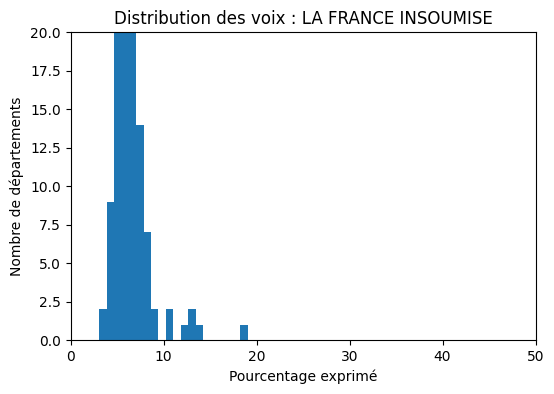

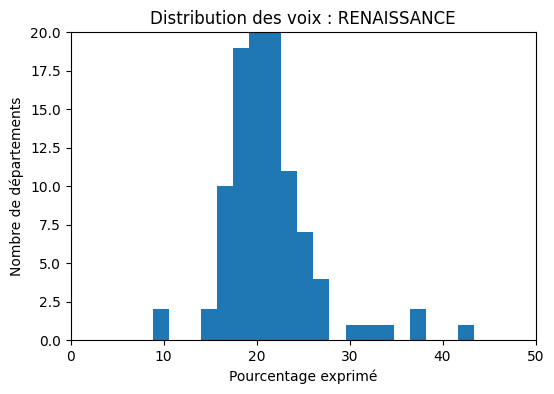

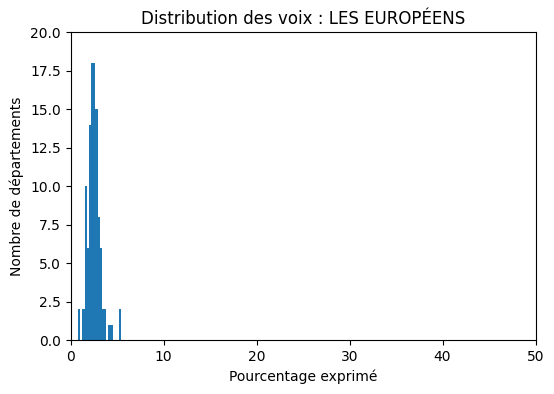

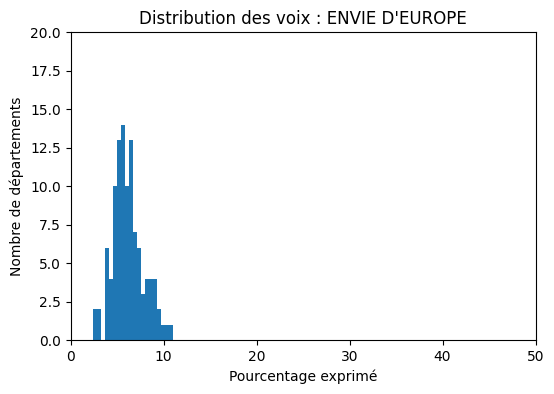

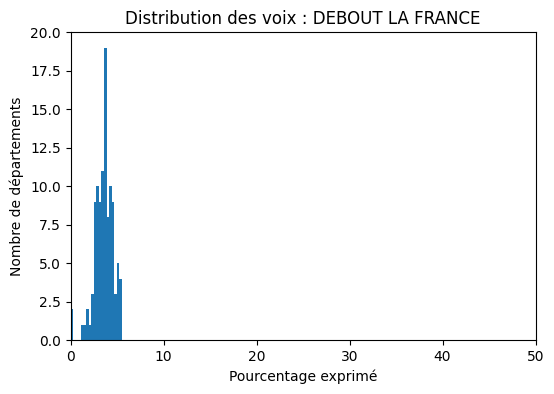

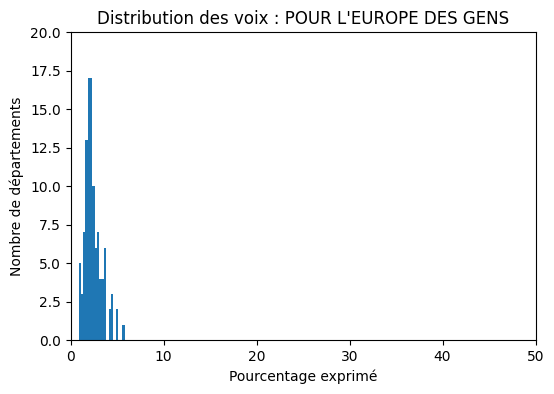

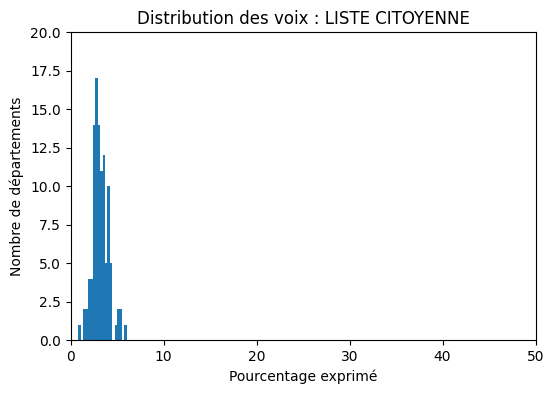

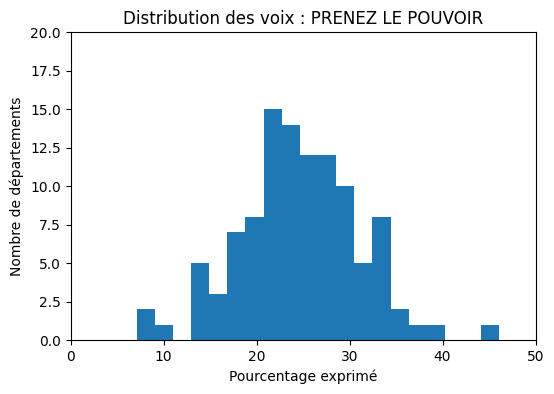

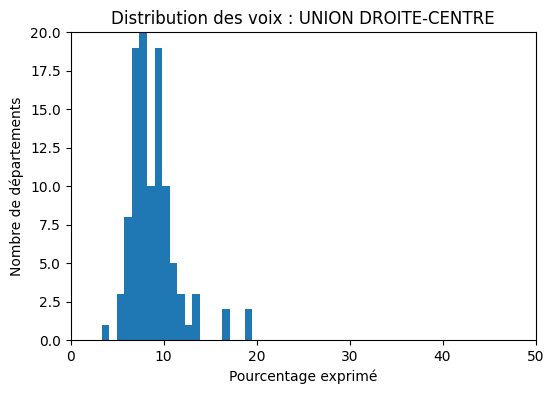

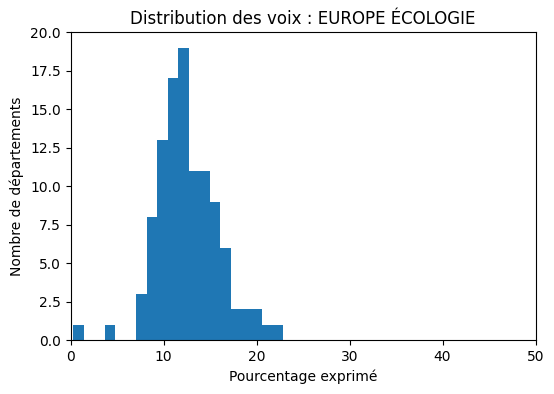

In [13]:
import matplotlib.pyplot as plt

for col in ee2019_p_d.columns:
    plt.figure(figsize=(6,4))
    plt.ylim(0,20)
    plt.xlim(0,50)
    plt.hist(ee2019_p_d[col], bins=20)
    plt.title(f"Distribution des voix : {col}")
    plt.xlabel("Pourcentage exprimé")
    plt.ylabel("Nombre de départements")
    plt.show()

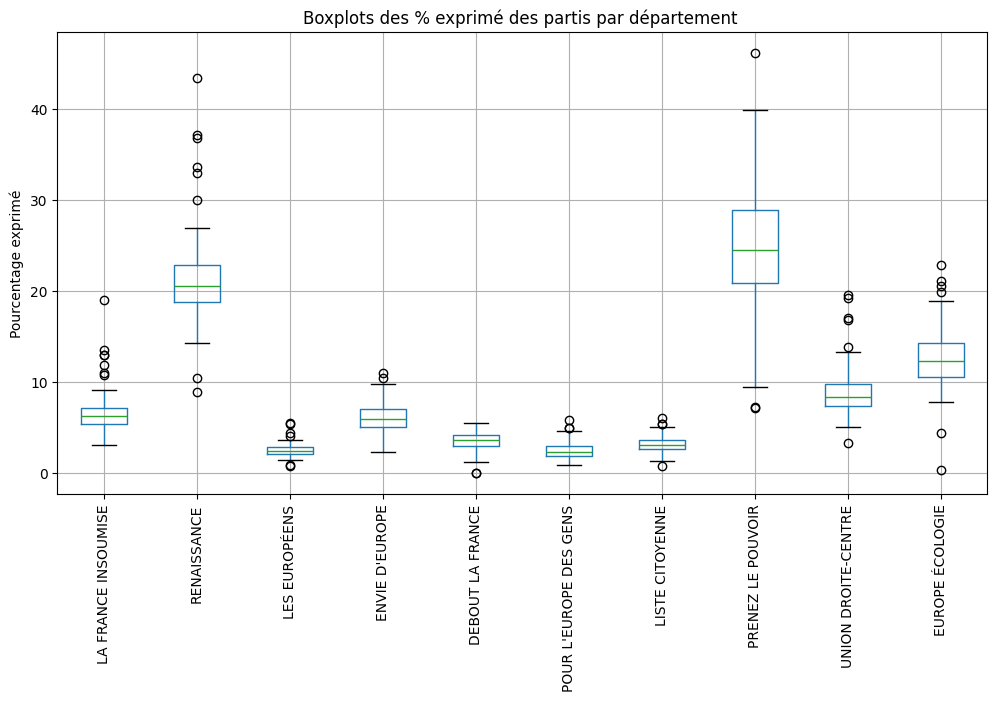

In [66]:
plt.figure(figsize=(12,6))
ee2019_p_d.boxplot(rot=90)
plt.title("Boxplots des % exprimé des partis par département ")
plt.ylabel("Pourcentage exprimé")
plt.show()


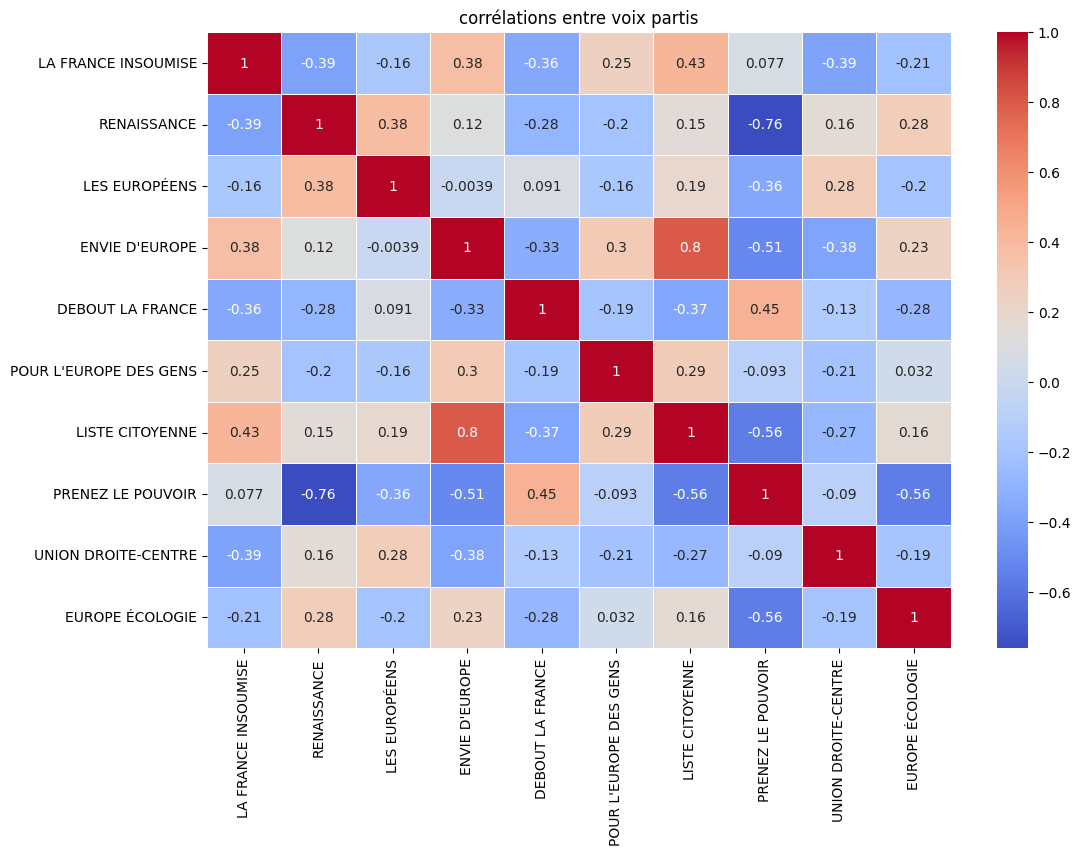

In [ ]:
import seaborn as sns

cor = ee2019_p_d.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("corrélations entre voix partis")
plt.show()


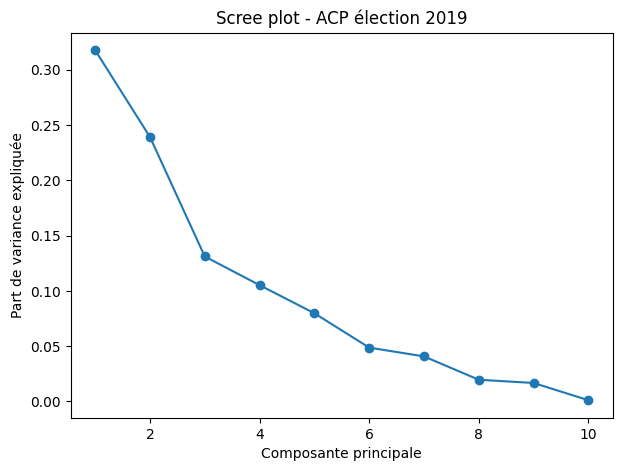

In [ ]:



# Standardisation des données
X = ee2019_p_d.values  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ACP
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
variance = pca.explained_variance_ratio_  #variance expliquer par axe

# Scree plot 
plt.figure(figsize=(7,5))
plt.plot(range(1, len(variance)+1), variance, marker='o')
plt.xlabel("Composante principale")
plt.ylabel("Part de variance expliquée")
plt.title("Scree plot - ACP élection 2019")
plt.show()


In [18]:
#on choisit les 2 premiers axes qui expliquent environs 50% de la variance 

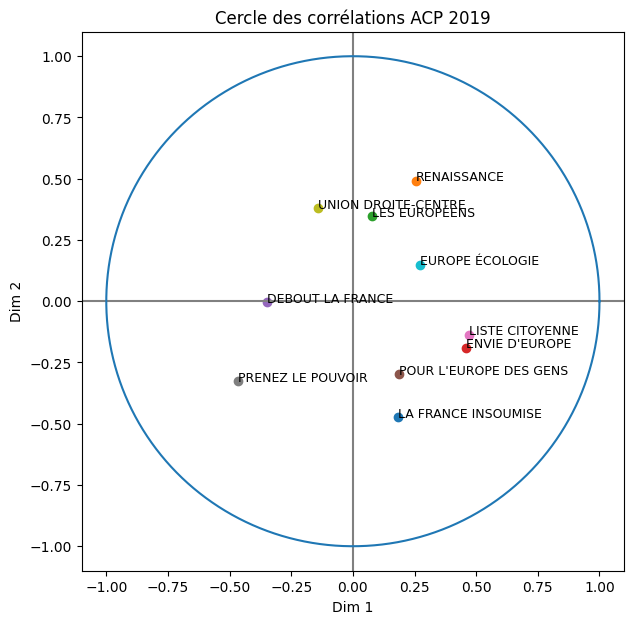

In [ ]:
# Coordonnées des variables dans le plan (F1, F2)
coords = pca.components_.T[:, :2]

plt.figure(figsize=(7, 7))
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

for i, parti in enumerate(ee2019_p_d.columns):
    plt.scatter(coords[i, 0], coords[i, 1])
    plt.text(coords[i, 0], coords[i, 1], parti, fontsize=9)

theta = np.linspace(0, 2*np.pi, 200)
plt.plot(np.cos(theta), np.sin(theta))

plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.title("Cercle des corrélations ACP 2019")
plt.show()


L’ACP réalisée sur les résultats des élections européennes de 2019 met en évidence deux oppositions structurant le paysage politique français. Le premier axe résume l’opposition entre, d’un côté, les listes pro-européennes en particulier Renaissance, Europe Écologie, Les Européens ou encore Union Droite-Centre (fortement corrélées positivement) et, de l’autre côté, les listes souverainistes ou eurosceptiques telles que Prenez le Pouvoir (RN). Cet axe reflète donc un clivage « pro-UE urbain » contre « périphérie souverainiste ». Le second axe distingue plutôt les partis modérés et institutionnels, situés en partie haute du cercle (Renaissance, UDI, EELV), des partis plus contestataires ou ancrés dans un électorat populaire, comme La France Insoumise ou Prenez le Pouvoir, positionnés en partie basse. Ainsi, l’ACP révèle une double structuration du vote : un clivage européen central et un clivage socio-politique opposant modération et contestation, ce qui permet de comprendre la logique des proximités observées entre listes et la répartition géographique de leurs soutiens.

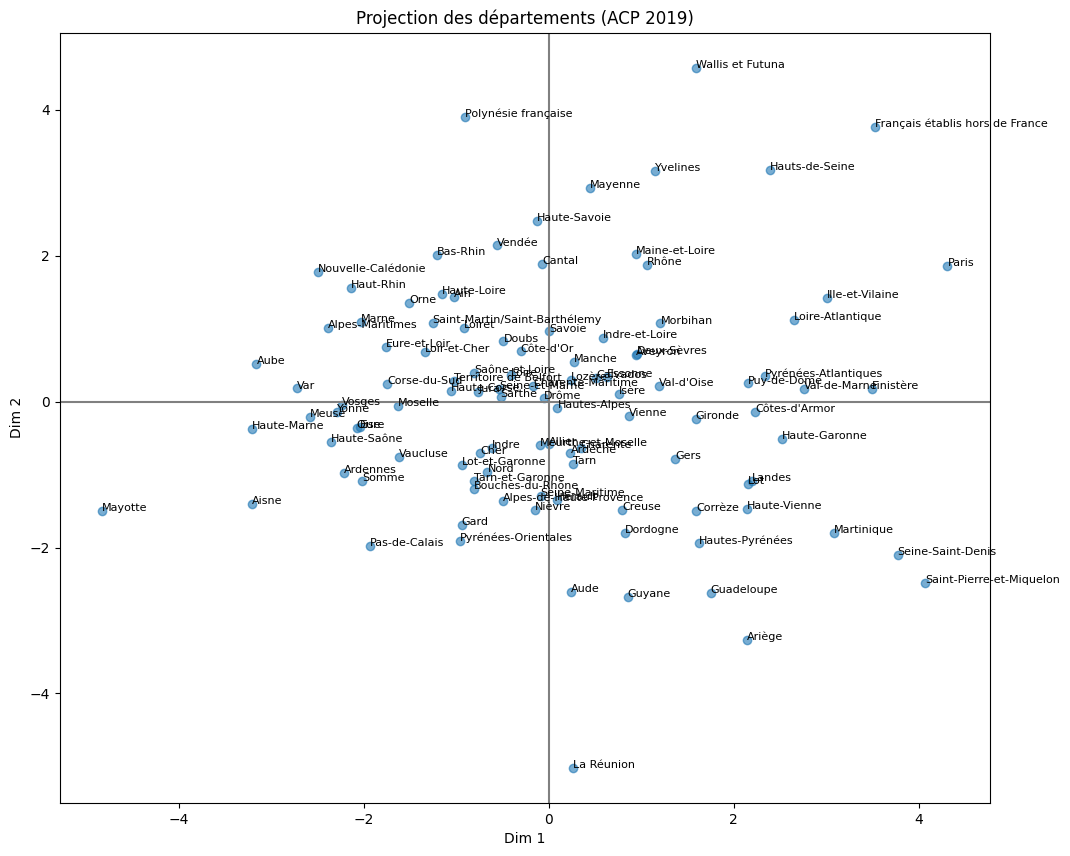

In [21]:
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6)
for i, dep in enumerate(ee19p.iloc[:,0]):
    plt.text(X_pca[i,0], X_pca[i,1], dep, fontsize=8)


plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.title("Projection des départements (ACP 2019)")
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')
plt.show()


In [ ]:
#on va cree un tableau qui reuni les partis par bord politique
gauche= ["LA FRANCE INSOUMISE","EUROPE ÉCOLOGIE","LISTE CITOYENNE"]
droite= ["UNION DROITE-CENTRE","DEBOUT LA FRANCE","POUR L'EUROPE DES GENS","PRENEZ LE POUVOIR"]
centre=["RENAISSANCE","ENVIE D'EUROPE","LES EUROPÉENS"]
G= ee19p[gauche].sum(axis=1)
D=ee19p[droite].sum(axis=1)
C=ee19p[centre].sum(axis=1)
total_pd=G+D+C

bord_pol=pd.DataFrame({
    "Dep":ee19.iloc[:,1],
    "G": G/total_pd,
    "C": C/total_pd,
    "D": D,
}) 

voix_bpf= bord_pol.iloc[:100,:]
#on reduit a 100 car les autres tableaux n'incluent pas les collectivites d'outre mer


In [46]:
voix_bpf.to_csv("ee_bp19.csv",index=False)

In [4]:
#on fait pareil pour 2024
ee2024_info = ee2024.iloc[:, :16]  
ee2024_parti= ee2024.iloc[:, 16:]

#Sachant qu'il ya des colonnes inutiles, on va juste se concentre sur le nom du parti et les infos sur le nbr de voix
cols_par_parti = 8
cols_utiles = [2,6] 

# on selectionne les colonnes correspondantes pour chaque partie 
cols_a_garder = []
for i in range(0, 304, cols_par_parti):
    cols_a_garder.extend([i + j for j in cols_utiles])

ee2024_parti_n = ee2024_parti.iloc[:, cols_a_garder]  #152 colonnes 

cols_pct = [col for col in ee2024_parti_n.columns if '%' in col ]
for col in cols_pct:
    ee2024_parti_n[col] = ee2024_parti_n[col].astype(str).str.replace('%','').str.replace(',','.').astype(float)  #on enleve les pourcentages à coté car ca limite l'analyse et on les transforme en float



/tmp/ipykernel_6212/3359079182.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ee2024_parti_n[col] = ee2024_parti_n[col].astype(str).str.replace('%','').str.replace(',','.').astype(float)  #on enleve les pourcentages à coté car ca limite l'analyse et on les transforme en float
/tmp/ipykernel_6212/3359079182.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ee2024_parti_n[col] = ee2024_parti_n[col].astype(str).str.replace('%','').str.replace(',','.').astype(float)  #on enleve les pourcentages à coté 

In [7]:
somme_voix_exp2 = []
cols_par_bloc=2
for i in range(0, ee2024_parti_n.shape[1], cols_par_bloc):
    bloc = ee2024_parti_n.iloc[:, i:i+cols_par_bloc]
    nom_parti = bloc.iloc[0,0]
    total_parti = bloc.iloc[:,1].sum()  # somme pour un parti sur tous les departements
    somme_voix_exp2.append((nom_parti, total_parti))

df_somme2 = pd.DataFrame(somme_voix_exp2, columns=['Parti','total%'])
df_somme2 = df_somme2.sort_values('total%', ascending=False)
top_parti2 = df_somme2.iloc[:10,0]  

ntop_parti2=top_parti2.unique()
cols_a_garder_final = []

for i in range(0, ee2024_parti_n.shape[1], cols_par_bloc):
    bloc = ee2024_parti_n.iloc[:, i:i+cols_par_bloc]
    nom_parti = bloc.iloc[0,0]
    if nom_parti in ntop_parti2 :
        cols_a_garder_final.extend(range(i, i+cols_par_bloc))

ee2024_p_d= ee2024_parti_n.iloc[:, cols_a_garder_final] 


In [8]:
top_parti2
#on a des tops partis un peu differente mais pg car cest justement ce qu'on veut analyser pq ca a changé? quels les nouveaux ?

4                                     La FRANCE REVIENT
10                                      BESOIN D'EUROPE
26                                           REVEIL EUR
3                                              LFI - UP
17    LA DROITE POUR FAIRE ENTENDRE LA VOIX DE LA FR...
2     LA FRANCE FIERE, MENEE PAR MARION MARECHAL ET ...
5                                       EUROPE ÉCOLOGIE
28                                                   AR
32                                          GAUCHE UNIE
7                                      PARTI ANIMALISTE
Name: Parti, dtype: object

In [11]:
#on va mettre les noms des parties dans les colonnes du tableau 2024
nouv_cols2 = []
nouveaux_noms2 = []

for i in range(0, ee2024_p_d.shape[1], cols_par_bloc):
    bloc = ee2024_p_d.iloc[:, i:i+cols_par_bloc]
    nom_parti = bloc.iloc[0, 0]
    idx_col = i + 1              
    nouv_cols2.append(idx_col)
    nouveaux_noms2.append(nom_parti)

# appliquer les nouveaux noms au dataframe entier
ee2024_p_d= ee2024_p_d.iloc[:, nouv_cols2]
ee2024_p_d.columns = nouveaux_noms2
ee24=pd.concat ([ ee2024_info ,ee2024_p_d], axis=1)
ee24




,Code département,Libellé département,Inscrits,Votants,% Votants,Abstentions,% Abstentions,Exprimés,% Exprimés/inscrits,% Exprimés/votants,...,"LA FRANCE FIERE, MENEE PAR MARION MARECHAL ET SOUTENUE PAR ÉRIC ZEMMOUR",LFI - UP,La FRANCE REVIENT,EUROPE ÉCOLOGIE,PARTI ANIMALISTE,BESOIN D'EUROPE,LA DROITE POUR FAIRE ENTENDRE LA VOIX DE LA FRANCE EN EUROPE,REVEIL EUR,AR,GAUCHE UNIE
0,01,Ain,449217,244260,"54,37%",204957,"45,63%",237523,"52,87%","97,24%",...,5.98,7.48,36.53,4.91,1.87,14.57,7.57,11.60,2.12,1.66
1,02,Aisne,373728,189750,"50,77%",183978,"49,23%",183689,"49,15%","96,81%",...,4.98,5.29,50.64,2.36,2.41,11.30,6.25,7.78,2.19,2.31
2,03,Allier,249428,138833,"55,66%",110595,"44,34%",131770,"52,83%","94,91%",...,5.32,5.18,36.70,3.07,2.34,13.00,8.88,11.78,3.91,5.10
3,04,Alpes-de-Haute-Provence,129172,74445,"57,63%",54727,"42,37%",72337,"56,00%","97,17%",...,5.77,8.54,36.30,5.27,1.96,12.08,4.18,13.63,3.64,2.95
4,05,Hautes-Alpes,115059,66931,"58,17%",48128,"41,83%",64928,"56,43%","97,01%",...,5.69,7.66,31.06,7.42,1.86,14.06,5.50,15.52,3.33,2.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,986,Wallis et Futuna,9018,2837,"31,46%",6181,"68,54%",2786,"30,89%","98,20%",...,9.98,8.61,18.63,3.91,0.86,26.60,10.12,6.07,2.01,2.33
103,987,Polynésie française,212084,28818,"13,59%",183266,"86,41%",27718,"13,07%","96,18%",...,5.04,5.14,20.58,6.55,0.07,41.54,3.09,4.72,1.13,1.00
104,988,Nouvelle-Calédonie,222683,29234,"13,13%",193449,"86,87%",27910,"12,53%","95,47%",...,16.01,4.01,21.71,3.51,0.15,28.64,12.66,4.17,0.91,0.49
105,ZX,Saint-Martin/Saint-Barthélemy,25276,4234,"16,75%",21042,"83,25%",4067,"16,09%","96,06%",...,9.66,5.02,27.44,4.99,0.25,28.25,4.62,5.90,1.25,0.47


In [24]:
#prochaine etape ACP!